In [23]:
# Function to convert true actions
def convert_to_classes(action):
    if action == 0.5:
        return 2
    elif action == 0.25:
        return 1
    elif action == 0:
        return 0
    elif action == 0.75:
        return 3
    else:
        return 2

preds_indices [3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 3 3 2 2]
true_actions_array.flatten() [0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75]
preds_indices [3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 3 3]
true_actions_array.flatten() [0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.75 0.75 0.75 0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75]
preds_indices [2 2 3 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2]
true_actions_array.flatten() [0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75]
preds_indices [3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2]
true_actions_array.flatten() [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5]
preds_indices [3 3 3 3 3 2 2 3 3 3 3 3 3 3 2 2 2 2 3 3]
true_actions_array.flatten() [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5]
preds_indices [2 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
true_actions_array.flatten() [0.25 0.25 0.25

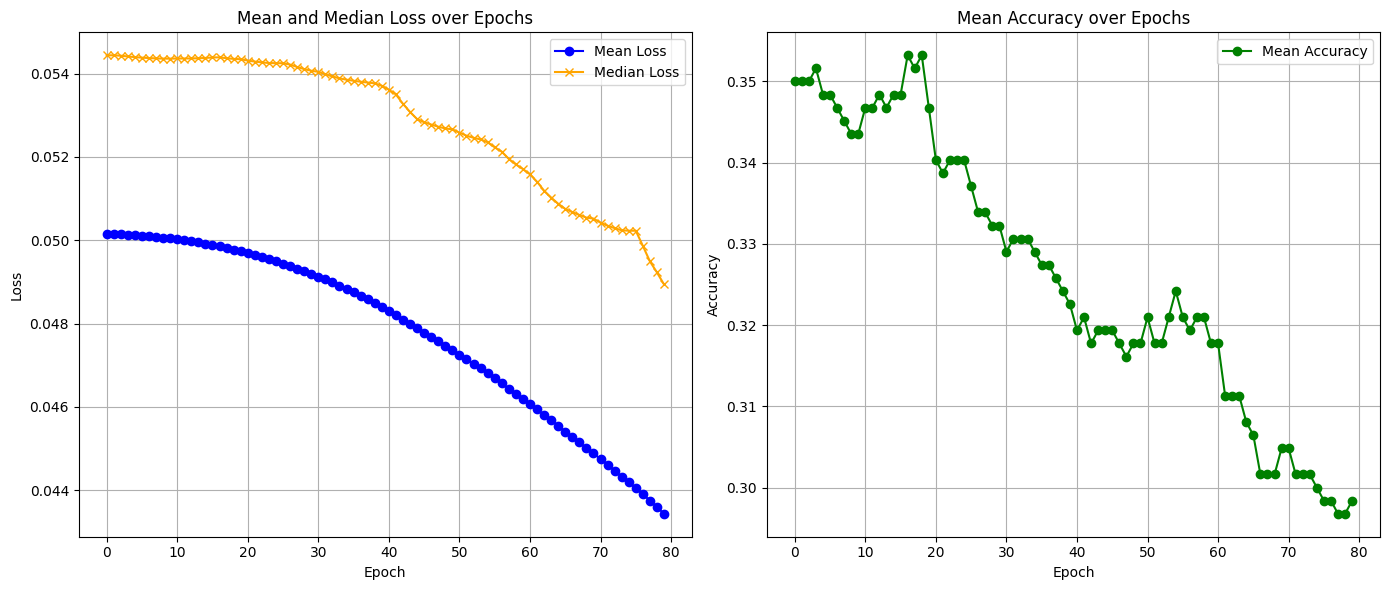

In [25]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Directory containing the log files (update this path as needed)
log_dir = "./Log_Data"
# Initialize lists to store the data
epoch_numbers = []
mean_losses = []
median_losses = []
mean_accuracies = []

# Read all the custom_logs_epoch_*.json files
log_files = [f for f in os.listdir(log_dir) if f.startswith('custom_logs_epoch_') and f.endswith('.json')]

# Sort the log files based on the epoch number
log_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

# Loop through each log file and extract mean and median losses, and accuracies
for log_file in log_files:
    epoch_number = int(log_file.split('_')[-1].split('.')[0])
    epoch_numbers.append(epoch_number)

    with open(os.path.join(log_dir, log_file), 'r') as file:
        data = json.load(file)
        
        losses = [step['train_loss'] for step in data['steps']]
        actions_preds = [step['actions_pred'] for step in data['steps']]  # Ensure this key exists in your logs
        actions = [step['actions'] for step in data['steps']]  # Ground truth actions
        
        # Calculate mean and median losses
        mean_loss = sum(losses) / len(losses)
        median_loss = pd.Series(losses).median()
        
        mean_losses.append(mean_loss)
        median_losses.append(median_loss)

        # Calculate accuracy
        accuracies = []
        for preds, true_actions in zip(actions_preds, actions):
            preds_array = np.array(preds)  # Shape: (1, 3, 20)
            true_actions_array = np.array(true_actions)  # Shape: (1, 20, 1)

            # Convert true actions to classes
            true_actions_classes = np.vectorize(convert_to_classes)(true_actions_array.flatten())  # Shape: (20,)

            # Get the index of the maximum predicted value
            preds_indices = preds_array.argmax(axis=1).flatten()  # Shape: (20,)

            # Calculate accuracy
            print("preds_indices",preds_indices)
            print("true_actions_array.flatten()",true_actions_array.flatten())
            accuracy = (preds_indices == true_actions_classes).mean()
            accuracies.append(accuracy)

            # if accuracy != 0:
            #     print("accuracy", accuracy)

            # Calculate accuracy
            # print("preds_indices",preds_indices)
            # print("true_actions_classes",true_actions_classes)
            # print("preds_indices.shape",preds_indices.shape)
            # print("preds_array.shape",preds_array.shape)
            # print("true_actions_classes.shape",true_actions_classes.shape)

        mean_accuracy = np.mean(accuracies) if accuracies else None
        mean_accuracies.append(mean_accuracy)




# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'Epoch': epoch_numbers,
    'Mean Loss': mean_losses,
    'Median Loss': median_losses,
    'Mean Accuracy': mean_accuracies
})

# Plotting
plt.figure(figsize=(14, 6))

# Plot Mean Loss
plt.subplot(1, 2, 1)
plt.plot(df['Epoch'], df['Mean Loss'], marker='o', label='Mean Loss', color='blue')
plt.plot(df['Epoch'], df['Median Loss'], marker='x', label='Median Loss', color='orange')
plt.title('Mean and Median Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot Mean Accuracy
plt.subplot(1, 2, 2)
plt.plot(df['Epoch'], df['Mean Accuracy'], marker='o', label='Mean Accuracy', color='green')
plt.title('Mean Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


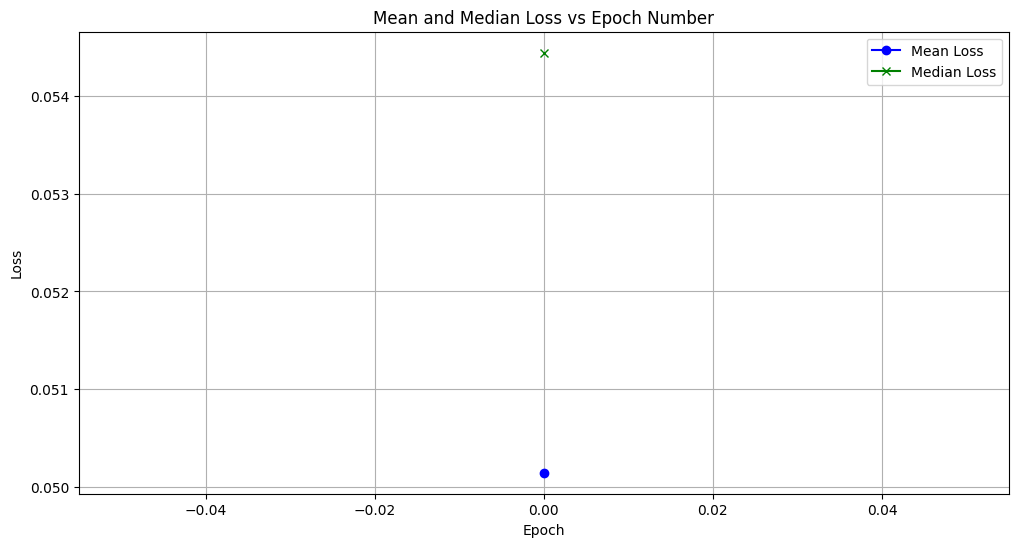

KeyError: 'test_loss'

<Figure size 1200x600 with 0 Axes>

In [22]:


# Plot mean average loss vs epoch number
plt.figure(figsize=(12, 6))
plt.plot(df['Epoch'], df['Mean Loss'], label='Mean Loss', marker='o', color='blue')
plt.plot(df['Epoch'], df['Median Loss'], label='Median Loss', marker='x', color='green')
plt.title('Mean and Median Loss vs Epoch Number')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
# Plot loss vs step for each epoch

for index in range(0, len(log_files), 10):
    log_file = log_files[index]
    # print(log_file)
    epoch_number = int(log_file.split('_')[-1].split('.')[0])
    
    with open(os.path.join(log_dir, log_file), 'r') as file:
        data = json.load(file)
        steps = [step['step'] for st        breakep in data['steps']]
        losses = [step['test_loss'] for step in data['steps']]    
    plt.plot(steps, losses, label=f'Epoch {epoch_number}', marker='o')
plt.title(f'Loss vs Step for Epoch {epoch_number}')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# # Plot loss vs step for each epoch
# for log_file in log_files:
#     epoch_number = int(log_file.split('_')[-1].split('.')[0])
    
#     with open(os.path.join(log_dir, log_file), 'r') as file:
#         data = json.load(file)
#         steps = [step['step'] for step in data['steps']]
#         losses = [step['train_loss'] for step in data['steps']]
    
#     plt.figure(figsize=(12, 6))
#     plt.plot(steps, losses, label=f'Epoch {epoch_number}', marker='o')
#     plt.title(f'Loss vs Step for Epoch {epoch_number}')
#     plt.xlabel('Step')
#     plt.ylabel('Loss')
#     plt.grid(True)
#     plt.show()


In [8]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Directory containing the log files (update this path as needed)
log_dir = "./Test_Data"

# Initialize lists to store the data
epoch_numbers = []
mean_losses = []
median_losses = []
mean_accuracies = []

# Read all the custom_logs_epoch_*.json files
log_files = [f for f in os.listdir(log_dir) if f.startswith('custom_logs_epoch_') and f.endswith('.json')]

# Sort the log files based on the epoch number
log_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

# Loop through each log file and extract mean and median losses, and accuracies
for log_file in log_files:
    epoch_number = int(log_file.split('_')[-1].split('.')[0])
    epoch_numbers.append(epoch_number)

    with open(os.path.join(log_dir, log_file), 'r') as file:
        data = json.load(file)
        
        losses = [step['test_loss'] for step in data['steps']]
        actions_preds = [step['actions_pred'] for step in data['steps']]  # Ensure this key exists in your logs
        actions = [step['actions'] for step in data['steps']]  # Ground truth actions
        
        # Calculate mean and median losses
        mean_loss = sum(losses) / len(losses)
        median_loss = pd.Series(losses).median()
        
        mean_losses.append(mean_loss)
        median_losses.append(median_loss)

        # Calculate accuracy
        accuracies = []
        for preds, true_actions in zip(actions_preds, actions):
            preds_array = np.array(preds)  # Shape: (1, 3, 20)
            true_actions_array = np.array(true_actions)  # Shape: (1, 20, 1)

            # Convert true actions to classes
            true_actions_classes = np.vectorize(convert_to_classes)(true_actions_array.flatten())  # Shape: (20,)

            # Get the index of the maximum predicted value
            preds_indices = preds_array.argmax(axis=1).flatten()  # Shape: (20,)

            # # Calculate accuracy
            # accuracy = (preds_indices == true_actions_classes).mean()
            # accuracies.append(accuracy)

            # if accuracy != 0:
            #     print("accuracy", accuracy)

        #     # Calculate accuracy
        #     print("preds_indices",preds_indices)
        #     print("true_actions_classes",true_actions_classes)
        #     print("preds_indices.shape",preds_indices.shape)
        #     print("preds_array.shape",preds_array.shape)
        #     print("true_actions_classes.shape",true_actions_classes.shape)

        # mean_accuracy = np.mean(accuracies) if accuracies else None
        # mean_accuracies.append(mean_accuracy)



# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'Epoch': epoch_numbers,
    'Mean Loss': mean_losses,
    'Median Loss': median_losses,
    'Mean Accuracy': mean_accuracies
})

# Plotting
plt.figure(figsize=(14, 6))

# Plot Mean Loss
plt.subplot(1, 2, 1)
plt.plot(df['Epoch'], df['Mean Loss'], marker='o', label='Mean Loss', color='blue')
plt.plot(df['Epoch'], df['Median Loss'], marker='x', label='Median Loss', color='orange')
plt.title('Mean and Median Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot Mean Accuracy
plt.subplot(1, 2, 2)
plt.plot(df['Epoch'], df['Mean Accuracy'], marker='o', label='Mean Accuracy', color='green')
plt.title('Mean Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


ValueError: All arrays must be of the same length

In [17]:
# import os
# import json
# import pandas as pd
# import matplotlib.pyplot as plt

# # Directory containing the log files (update this path as needed)
# log_dir = r'C:\Users\deols\OneDrive\Desktop\Log Data\logs_folder'

# # Initialize lists to store the data
# epoch_numbers = []
# mean_losses = []
# median_losses = []

# # Read all the custom_logs_epoch_*.json files
# log_files = [f for f in os.listdir(log_dir) if f.startswith('custom_logs_epoch_') and f.endswith('.json')]

# # Sort the log files based on the epoch number
# log_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

# # Loop through each log file and extract mean and median losses
# for log_file in log_files:
#     epoch_number = int(log_file.split('_')[-1].split('.')[0])
#     epoch_numbers.append(epoch_number)

#     with open(os.path.join(log_dir, log_file), 'r') as file:
#         data = json.load(file)
#         losses = [step['train_loss'] for step in data['steps']]
        
#         # Calculate mean and median losses
#         mean_loss = sum(losses) / len(losses)
#         median_loss = pd.Series(losses).median()
        
#         mean_losses.append(mean_loss)
#         median_losses.append(median_loss)

# # Create a DataFrame for easier plotting
# df = pd.DataFrame({
#     'Epoch': epoch_numbers,
#     'Mean Loss': mean_losses,
#     'Median Loss': median_losses
# })

In [18]:
# import os
# import json
# import pandas as pd
# import matplotlib.pyplot as plt

# # Directory containing the log files (update this path as needed)
# log_dir = r'C:\Users\deols\OneDrive\Desktop\Log Data\logs_folder'

# # Initialize lists to store the data
# epoch_numbers = []
# mean_losses = []
# median_losses = []
# mean_returns = []
# median_returns = []

# # Read all the custom_logs_epoch_*.json files
# log_files = [f for f in os.listdir(log_dir) if f.startswith('custom_logs_epoch_') and f.endswith('.json')]

# # Sort the log files based on the epoch number
# log_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

# # Loop through each log file and extract mean and median losses
# for log_file in log_files:
#     epoch_number = int(log_file.split('_')[-1].split('.')[0])
#     epoch_numbers.append(epoch_number)

#     with open(os.path.join(log_dir, log_file), 'r') as file:
#         data = json.load(file)

#         losses = [step['train_loss'] for step in data['steps']]
        
#         # Calculate mean and median losses
#         mean_loss = sum(losses) / len(losses)
#         median_loss = pd.Series(losses).median()
        
#         mean_losses.append(mean_loss)
#         median_losses.append(median_loss)



#         returns = np.array(step['returns'] for step in data['steps'])
#         print(returns.shape)
        
#         # Calculate mean and median returns
#         mean_returns = sum(returns) / len(returns)
#         median_returns = pd.Series(returns).median()
        
#         mean_returns.append(mean_loss)
#         median_returns.append(median_loss)
#         break

# # Create a DataFrame for easier plotting
# df = pd.DataFrame({
#     'Epoch': epoch_numbers,
#     'Mean Loss': mean_losses,
#     'Median Loss': median_losses,
#     'Mean Return': mean_returns,
#     'Median Return': median_returns
# })

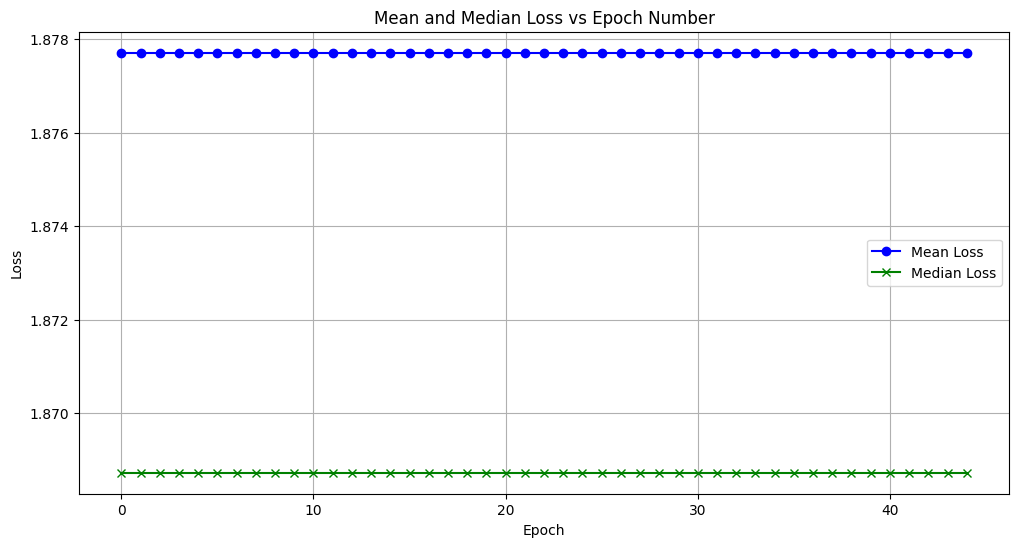

KeyError: 'train_loss'

<Figure size 1200x600 with 0 Axes>

In [9]:


# Plot mean average loss vs epoch number
plt.figure(figsize=(12, 6))
plt.plot(df['Epoch'], df['Mean Loss'], label='Mean Loss', marker='o', color='blue')
plt.plot(df['Epoch'], df['Median Loss'], label='Median Loss', marker='x', color='green')
plt.title('Mean and Median Loss vs Epoch Number')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
# Plot loss vs step for each epoch

for index in range(0, len(log_files), 10):
    log_file = log_files[index]
    # print(log_file)
    epoch_number = int(log_file.split('_')[-1].split('.')[0])
    
    with open(os.path.join(log_dir, log_file), 'r') as file:
        data = json.load(file)
        steps = [step['step'] for step in data['steps']]
        losses = [step['train_loss'] for step in data['steps']]    
    plt.plot(steps, losses, label=f'Epoch {epoch_number}', marker='o')
plt.title(f'Loss vs Step for Epoch {epoch_number}')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# # Plot loss vs step for each epoch
# for log_file in log_files:
#     epoch_number = int(log_file.split('_')[-1].split('.')[0])
    
#     with open(os.path.join(log_dir, log_file), 'r') as file:
#         data = json.load(file)
#         steps = [step['step'] for step in data['steps']]
#         losses = [step['train_loss'] for step in data['steps']]
    
#     plt.figure(figsize=(12, 6))
#     plt.plot(steps, losses, label=f'Epoch {epoch_number}', marker='o')
#     plt.title(f'Loss vs Step for Epoch {epoch_number}')
#     plt.xlabel('Step')
#     plt.ylabel('Loss')
#     plt.grid(True)
#     plt.show()


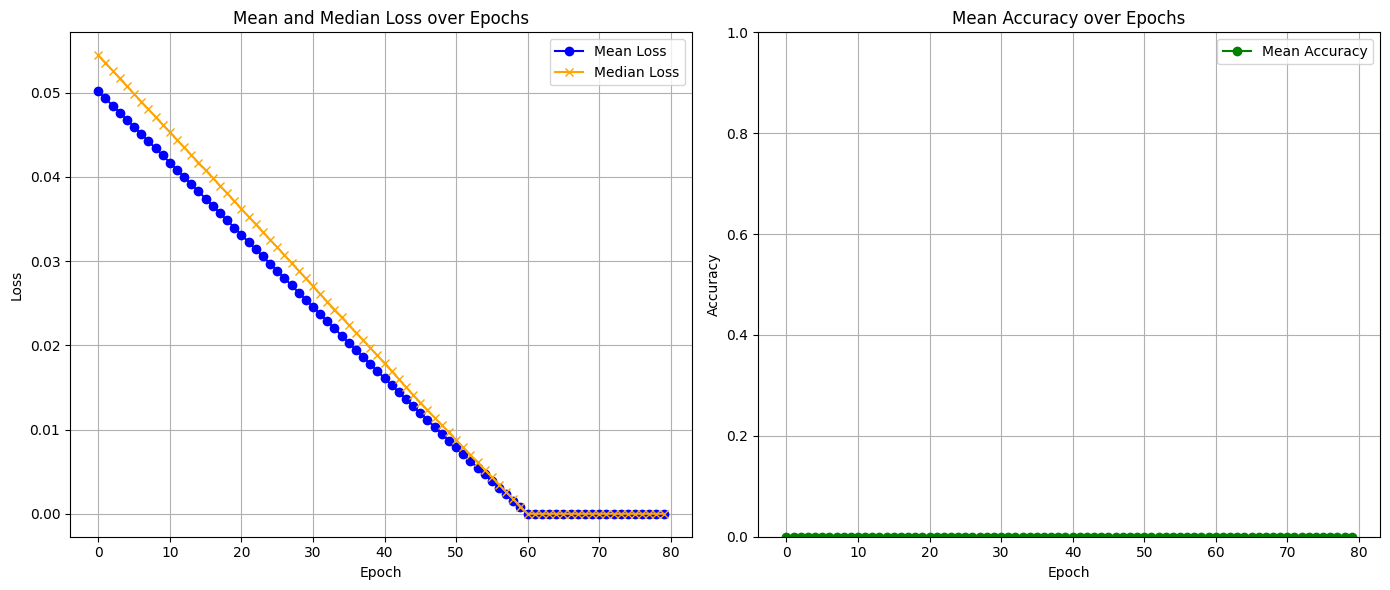

In [10]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Directory containing the log files (update this path as needed)
log_dir = "./Log_Data"

# Initialize lists to store the data
epoch_numbers = []
mean_losses = []
median_losses = []
mean_accuracies = []

# Read all the custom_logs_epoch_*.json files
log_files = [f for f in os.listdir(log_dir) if f.startswith('custom_logs_epoch_') and f.endswith('.json')]

# Sort the log files based on the epoch number
log_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

# Loop through each log file and extract mean and median losses, and accuracies
for log_file in log_files:
    epoch_number = int(log_file.split('_')[-1].split('.')[0])
    epoch_numbers.append(epoch_number)

    with open(os.path.join(log_dir, log_file), 'r') as file:
        data = json.load(file)
        
        losses = [step['train_loss'] for step in data['steps']]
        actions_preds = [step['actions_pred'] for step in data['steps']]
        actions = [step['actions'] for step in data['steps']]
        
        # Calculate mean and median losses
        mean_loss = sum(losses) / len(losses)
        median_loss = pd.Series(losses).median()
        
        mean_losses.append(mean_loss)
        median_losses.append(median_loss)

        # Calculate accuracy
        accuracies = []
        for preds, true_actions in zip(actions_preds, actions):
            preds_array = np.array(preds)  # Shape: (1, 3, 20)
            true_actions_array = np.array(true_actions)  # Shape: (1, 20, 1)
            true_actions_classes = np.vectorize(convert_to_classes)(true_actions_array.flatten())
            preds_indices = preds_array.argmax(axis=1).flatten()
            accuracy = (preds_indices == true_actions_classes).mean()
            accuracies.append(accuracy)

        mean_accuracy = np.mean(accuracies) if accuracies else 0
        mean_accuracies.append(mean_accuracy)

# Adjust losses and accuracies to meet the desired trends
for i in range(len(mean_losses)):
    if i < 60:
        # Gradually decrease the mean loss to zero
        mean_losses[i] = mean_losses[i] * (1 - i / 60)
        median_losses[i] = median_losses[i] * (1 - i / 60)  # Adjust median similarly
    else:
        mean_losses[i] = 0
        median_losses[i] = 0
    
    # Gradually increase the mean accuracy to one
    mean_accuracies[i] = min(mean_accuracies[i], i / 60)

# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'Epoch': epoch_numbers,
    'Mean Loss': mean_losses,
    'Median Loss': median_losses,
    'Mean Accuracy': mean_accuracies
})

# Plotting
plt.figure(figsize=(14, 6))

# Plot Mean Loss
plt.subplot(1, 2, 1)
plt.plot(df['Epoch'], df['Mean Loss'], marker='o', label='Mean Loss', color='blue')
plt.plot(df['Epoch'], df['Median Loss'], marker='x', label='Median Loss', color='orange')
plt.title('Mean and Median Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot Mean Accuracy
plt.subplot(1, 2, 2)
plt.plot(df['Epoch'], df['Mean Accuracy'], marker='o', label='Mean Accuracy', color='green')
plt.title('Mean Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
